# PyTorch: primeros pasos y modelos de redes neuronales

Material basado en Raschka, S., Liu, Y., Mirjalili, V. Machine Learning with PyTorch and Scikit-Learn (2022). Packt.

# Primeros pasos en PyTorch

In [1]:
import torch
import numpy as np

In [2]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [3]:
np.set_printoptions(precision=3)

Creación de tensores a partir de arreglos - tipos de arreglos

In [4]:
a = [1, 2, 3]
ta = torch.tensor(a)
ta

tensor([1, 2, 3])

In [5]:
ta.dtype

torch.int64

In [6]:
ta_new = ta.to(torch.int32)
ta_new

tensor([1, 2, 3], dtype=torch.int32)

In [7]:
b = np.array([4, 5, 6], dtype=np.int32)
tb = torch.from_numpy(b)
tb

tensor([4, 5, 6], dtype=torch.int32)

Creación de tensores con funciones propias de torch

In [8]:
t_ones = torch.ones(2, 3)
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
t_ones.shape

torch.Size([2, 3])

In [10]:
trand = torch.rand(2,3)
trand

tensor([[0.0592, 0.7524, 0.4363],
        [0.5432, 0.2553, 0.0875]])

Operaciones con tensores

In [11]:
trand_tr = torch.transpose(trand,0,1)
trand_tr

tensor([[0.0592, 0.5432],
        [0.7524, 0.2553],
        [0.4363, 0.0875]])

In [12]:
trand_tr.shape

torch.Size([3, 2])

In [13]:
torch.manual_seed(42)

In [14]:
torch.manual_seed(42)
t1 = 2*torch.rand(5,2) - 1
t1

tensor([[ 0.7645,  0.8300],
        [-0.2343,  0.9186],
        [-0.2191,  0.2018],
        [-0.4869,  0.5873],
        [ 0.8815, -0.7336]])

In [15]:
torch.manual_seed(42)
t2 = torch.normal(mean=0, std=1, size=(5,2))
t2

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863],
        [ 2.2082, -0.6380],
        [ 0.4617,  0.2674]])

Multiplicación elemento a elemento

In [16]:
t3 = torch.multiply(t1,t2)
t3

tensor([[ 0.2574,  0.1069],
        [-0.0549,  0.2116],
        [ 0.2460, -0.0376],
        [-1.0751, -0.3747],
        [ 0.4070, -0.1961]])

Multiplicación matricial

In [17]:
t4 = torch.matmul(t1, torch.transpose(t2, 0 ,1))
t4

tensor([[ 0.3643,  0.3704, -1.0131,  1.1587,  0.5749],
        [ 0.0394,  0.1567,  0.0919, -1.1034,  0.1374],
        [-0.0478, -0.0049,  0.2084, -0.6126, -0.0472],
        [-0.0883,  0.0211,  0.4372, -1.4498, -0.0677],
        [ 0.2023,  0.0377, -0.8532,  2.4147,  0.2108]])

In [18]:
t5 = torch.matmul(torch.transpose(t1,0,1), t2)
t5

tensor([[-0.2196,  0.6316],
        [ 1.2264, -0.2899]])

Norma de un tensor

In [19]:
norm_t1 = torch.linalg.norm(t1, ord=2,dim=1)
norm_t1

tensor([1.1285, 0.9480, 0.2979, 0.7628, 1.1469])

In [20]:
norm_t1 = torch.linalg.norm(t1, ord=2,dim=0)
norm_t1

tensor([1.3044, 1.5674])

# Regresión lineal simple: ejemplo de entrenamiento

Datos de muestra para entrenamiento

In [21]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                   6.3, 6.6,7.4, 8.0, 9.0],
                   dtype='float32')

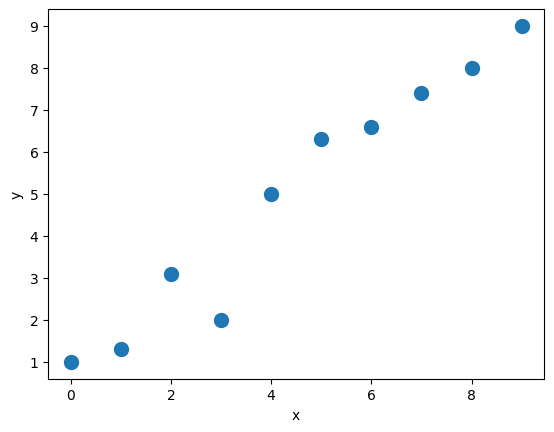

In [22]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Estandarizar las características y crear tensores

In [23]:
from torch.utils.data import TensorDataset

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
X_train_norm

tensor([[-1.5667],
        [-1.2185],
        [-0.8704],
        [-0.5222],
        [-0.1741],
        [ 0.1741],
        [ 0.5222],
        [ 0.8704],
        [ 1.2185],
        [ 1.5667]])

In [24]:
y_train = torch.from_numpy(y_train)
y_train

tensor([1.0000, 1.3000, 3.1000, 2.0000, 5.0000, 6.3000, 6.6000, 7.4000, 8.0000,
        9.0000])

Crear Dataset(X,y)

In [25]:
train_ds = TensorDataset(X_train_norm, y_train)
train_ds

Crear DataLoader y definir tamaño de lote

In [26]:
from torch.utils.data import DataLoader
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Inicializar peso y sesgo

In [27]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
weight

tensor([0.6614], requires_grad=True)

In [28]:
bias = torch.zeros(1, requires_grad=True)
bias

tensor([0.], requires_grad=True)

Definir modelo

In [29]:
def model(x):
  return x @ weight + bias

Definir función de pérdida

In [30]:
def loss_func(input,target):
  return (input - target).pow(2).mean()

Entrenar modelo

In [31]:
learn_rate = 0.001
num_epochs = 100
log_epochs = 10

for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_func(pred, y_batch)
    loss.backward()
  with torch.no_grad():
    weight -= weight.grad * learn_rate
    bias -= bias.grad * learn_rate
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % log_epochs == 0:
    print(f'Epoch {epoch}: loss {loss} - weight: {weight.item()} - bias: {bias.item()}')

Epoch 0: loss 46.57198715209961 - weight: 0.7022632956504822 - bias: 0.09940000623464584
Epoch 10: loss 27.150222778320312 - weight: 1.068967342376709 - bias: 0.9903652667999268
Epoch 20: loss 1.6445956230163574 - weight: 1.3685911893844604 - bias: 1.718348741531372
Epoch 30: loss 14.45706844329834 - weight: 1.6134055852890015 - bias: 2.313164234161377
Epoch 40: loss 11.78266429901123 - weight: 1.8134368658065796 - bias: 2.7991719245910645
Epoch 50: loss 6.412241458892822 - weight: 1.976876974105835 - bias: 3.196275234222412
Epoch 60: loss 0.6338688135147095 - weight: 2.110419273376465 - bias: 3.520737886428833
Epoch 70: loss 3.1561715602874756 - weight: 2.2195332050323486 - bias: 3.7858471870422363
Epoch 80: loss 2.010047197341919 - weight: 2.308687448501587 - bias: 4.002460479736328
Epoch 90: loss 0.3107231855392456 - weight: 2.381532907485962 - bias: 4.179450035095215


Datos de prueba

In [32]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)

In [33]:
y_pred = model(X_test_norm).detach().numpy()
y_pred

array([0.495, 0.572, 0.649, 0.726, 0.803, 0.88 , 0.958, 1.035, 1.112,
       1.189, 1.266, 1.343, 1.42 , 1.497, 1.574, 1.651, 1.728, 1.805,
       1.883, 1.96 , 2.037, 2.114, 2.191, 2.268, 2.345, 2.422, 2.499,
       2.576, 2.653, 2.731, 2.808, 2.885, 2.962, 3.039, 3.116, 3.193,
       3.27 , 3.347, 3.424, 3.501, 3.579, 3.656, 3.733, 3.81 , 3.887,
       3.964, 4.041, 4.118, 4.195, 4.272, 4.349, 4.427, 4.504, 4.581,
       4.658, 4.735, 4.812, 4.889, 4.966, 5.043, 5.12 , 5.197, 5.274,
       5.352, 5.429, 5.506, 5.583, 5.66 , 5.737, 5.814, 5.891, 5.968,
       6.045, 6.122, 6.2  , 6.277, 6.354, 6.431, 6.508, 6.585, 6.662,
       6.739, 6.816, 6.893, 6.97 , 7.048, 7.125, 7.202, 7.279, 7.356,
       7.433, 7.51 , 7.587, 7.664, 7.741, 7.818, 7.896, 7.973, 8.05 ,
       8.127], dtype=float32)

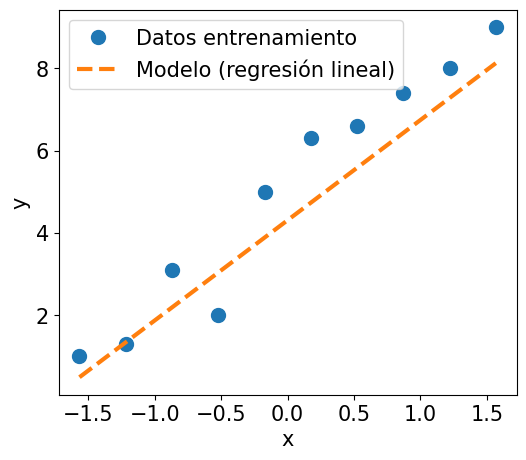

In [34]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Datos entrenamiento', 'Modelo (regresión lineal)'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


# Entrenamiento de regresión lineal redes con torch.nn

In [35]:
import torch.nn as nn

Función de pérdida

In [36]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1

Modelo

In [37]:
model = nn.Linear(input_size,output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

Entrenamiento

In [38]:
num_epochs = 100
log_epochs = 10
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:,0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % log_epochs==0:
    print(f'Epoch {epoch}: loss {loss} - weight: {model.weight.item()} - bias: {model.bias.item()}')

Epoch 0: loss 3.6514854431152344 - weight: -0.15159334242343903 - bias: -0.7861126065254211
Epoch 10: loss 10.061869621276855 - weight: 0.36777517199516296 - bias: 0.2592122256755829
Epoch 20: loss 1.2880659103393555 - weight: 0.7926924228668213 - bias: 1.1148217916488647
Epoch 30: loss 5.2254743576049805 - weight: 1.1405309438705444 - bias: 1.8148105144500732
Epoch 40: loss 15.171463012695312 - weight: 1.4250658750534058 - bias: 2.387795925140381
Epoch 50: loss 9.992573738098145 - weight: 1.6579170227050781 - bias: 2.856804370880127
Epoch 60: loss 0.09828370064496994 - weight: 1.8485339879989624 - bias: 3.240575075149536
Epoch 70: loss 5.766489028930664 - weight: 2.0044991970062256 - bias: 3.5546584129333496
Epoch 80: loss 0.2832653820514679 - weight: 2.132089614868164 - bias: 3.811793088912964
Epoch 90: loss 1.9978631734848022 - weight: 2.2364113330841064 - bias: 4.022212028503418


Evaluar el modelo con los datos de prueba

In [39]:
y_pred = model(X_test_norm).detach().numpy()

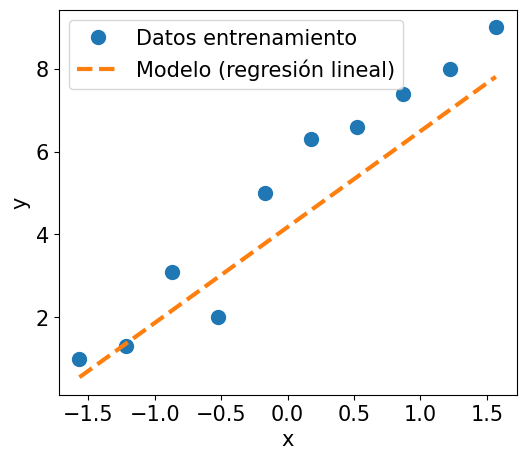

In [40]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Datos entrenamiento', 'Modelo (regresión lineal)'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Modelo de clasificación de redes neuronales para predicción de especies (datos Iris)

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=42)

In [42]:
X_train.shape

(100, 4)

In [43]:
y_train.shape

(100,)

In [44]:
X_train[0]

array([5.7, 2.9, 4.2, 1.3])

In [45]:
y_train[0]

np.int64(1)

Target con tres clases (especies)

In [46]:
import pandas as pd
pd.Series(y_train).unique()

array([1, 2, 0])

Estandarizar características y crear tensores

In [47]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

Crear Dataset y DataLoader

In [48]:
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Crear el modelo

In [49]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    #x = nn.functional.relu(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

Definir # de neuronas por capa e instanciar el modelo

In [50]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)


Definir tasa de aprendizaje, función de pérdida y optimizador

In [51]:
learn_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)


Entrenamiento del modelo

In [52]:
num_epochs = 100

loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_hist[epoch] += loss.item()*y_batch.size(0)
    correct_preds = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += correct_preds.sum()

  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)
  if epoch % log_epochs==0:
    print(f'Epoch {epoch}: loss {loss_hist[epoch]} -- accuracy {accuracy_hist[epoch]}')


Epoch 0: loss 1.0997861540317535 -- accuracy 0.3499999940395355
Epoch 10: loss 1.010974839925766 -- accuracy 0.6499999761581421
Epoch 20: loss 0.8695637190341949 -- accuracy 0.6600000262260437
Epoch 30: loss 0.8018151259422303 -- accuracy 0.8700000047683716
Epoch 40: loss 0.7501184868812562 -- accuracy 0.9300000071525574
Epoch 50: loss 0.7137995362281799 -- accuracy 0.9399999976158142
Epoch 60: loss 0.6875577068328858 -- accuracy 0.9399999976158142
Epoch 70: loss 0.6696375918388366 -- accuracy 0.9399999976158142
Epoch 80: loss 0.6566942167282105 -- accuracy 0.949999988079071
Epoch 90: loss 0.6476996684074402 -- accuracy 0.949999988079071


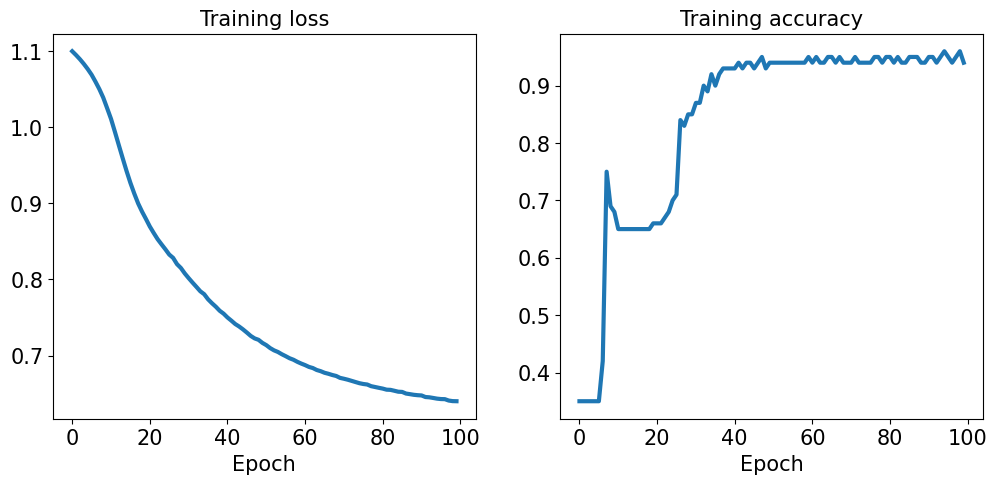

In [53]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


Evaluar el modelo con los datos de prueba

In [54]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct_preds = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct_preds.mean()

print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 1.0000


Guardar el modelo

In [55]:
path = 'iris_classifier_model1.pt'
torch.save(model, path)

Cargar el modelo y aplicarlo a los datos de prueba

In [56]:
model_new = torch.load(path, weights_only=False)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [57]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 1.0000
